## Netflix Analysis for Moive Recomendation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# why this required beacuse in each row having large amount(messy) of data  
df = pd.read_csv(r"D:\Data_Set\mymoviedb.csv", engine='python', encoding='ISO-8859-1', on_bad_lines='skip')  # or we use lineterminator = '\n'
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
# cheaking info of DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.0+ KB


In [ ]:
#  checking the any duplicate value present or not 
df.duplicated().sum()

0

In [5]:
# applying some statistics on numerical columns
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.328675,1392.901893,6.439487
std,108.879237,2611.322317,1.129807
min,13.354000,0.000000,0.000000
25%,16.129250,146.000000,5.900000
50%,21.200000,444.000000,6.500000
75%,35.195250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration summary
### 1) we have dataframe which consist 9837 Rows and 9 columns
### 2) in our dataset no NAN value and no duplicate value
### 3) Realese_date column need to transfer into dateTime format
### 4) drop the unwanted columns from dataset like 'Overview', 'Original_Language', 'Poster_Url'
### 5) Genre column has coma seprated value and while spaces need to be handle casted into category

In [6]:
#1) coverting string DATE into DateTime Format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce',dayfirst=True)
print(df['Release_Date'].dtype)

datetime64[ns]


In [7]:
# We required only year for analysis so take only YEAR
df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].dtype)

int32


In [8]:
# Droping the column which are not required for analysis 
df.drop(columns=['Overview', 'Original_Language', 'Poster_Url'],inplace=True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9821,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9822,2020,Violent Delights,13.356,8,3.5,Horror
9823,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9824,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


### Categorising the vote_average 
### We need tocut vote_average column into  four categories
### Popular, Average, Below_Average, Not_Popular

In [9]:
# Function for categories
def catigorize_col(df, col, labels):
    edge  =[df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edge, labels = labels)
    return df    

In [10]:
# Categorizing the value
labels = ['Not_Popular', 'Below_Avg', 'Average', 'Popular']

catigorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9821,1973,Badlands,13.357,896,Popular,"Drama, Crime"
9822,2020,Violent Delights,13.356,8,Not_Popular,Horror
9823,2016,The Offering,13.355,94,Not_Popular,"Mystery, Thriller, Horror"
9824,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [11]:
# Cheacking Categorical Count
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Average        2411
Below_Avg      2398
Name: count, dtype: int64

In [12]:
# Droping Duplicate value and checking is null present or not 
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

### Now spliting Genre Column into a list and explore your dataframe to have only one genre per row for each moive

In [14]:
#  Spliting the Column
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [ ]:
# Casting column into category
df['Genre']= df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25547 entries, 0 to 25546
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25547 non-null  int32   
 1   Title         25547 non-null  object  
 2   Popularity    25547 non-null  float64 
 3   Vote_Count    25547 non-null  int64   
 4   Vote_Average  25547 non-null  category
 5   Genre         25547 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.5+ KB


In [15]:
# Cheking the how much value are unique 
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Q1 What is most frequent Genre of moive released on Netflix

In [ ]:
# giving information about spesific column
df['Genre'].describe()

count     25547
unique       19
top       Drama
freq       3714
Name: Genre, dtype: object

In [17]:
sns.set_style('whitegrid')

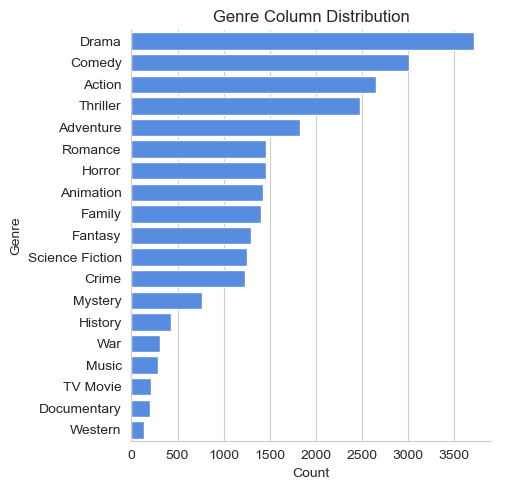

In [ ]:
# Categorical Plot to check most frequent Genre of Moive
sns.catplot(data=df, y='Genre', kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')

plt.title('Genre Column Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### Conclusion: DRAMA Genre is most frequent Genre in our DataSet has appeared more than 14% of 19 genre

# Q2 Which genre has highest votes 

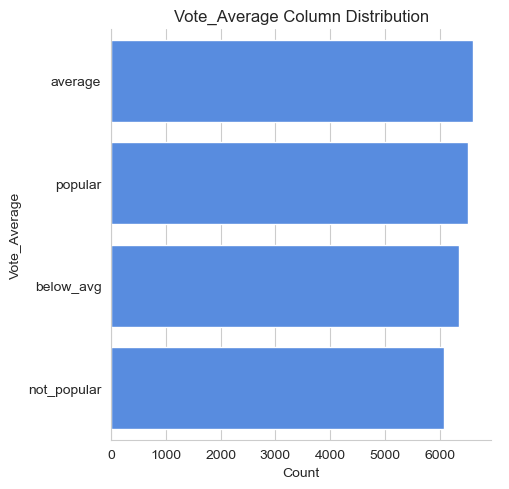

In [ ]:
# Checking which genre has high votes
sns.catplot(data=df, y='Vote_Average', kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')

plt.title('Vote_Average Column Distribution')
plt.xlabel('Count')
plt.ylabel('Vote_Average')
plt.tight_layout()
plt.show()

### We have 25.5% of our dataset with popular votes Drama Again get highest popularity among fan by bieng having more than 18.5% moive popularation 

# Q3 Which moive get highest popularity  and what`s its genre

In [148]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action Adventure and Sience Fiction .

# Q4 Which moive got lowest popularity what is it`s genre

In [149]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25541,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25542,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25543,2021,The United States vs. Billie Holiday,13.354,152,average,History
25544,1984,Threads,13.354,186,popular,War
25545,1984,Threads,13.354,186,popular,Drama
25546,1984,Threads,13.354,186,popular,Science Fiction


### The united states, thread' has the highest lowest rate in our datasetand it has genres of music , drama , 'war', 'sci-fi' and history`.

# Q5 Which year has most filmed year 

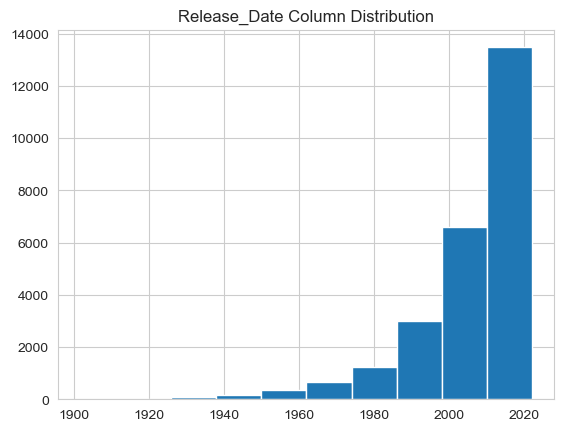

In [150]:
df['Release_Date'].hist()
plt.title('Release_Date Column Distribution')
plt.show()

### Year 2020 has the highest filmming rate in our dataset.